In [35]:
from splinter import Browser
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
executable_path = {'executable_path': 'templates/chromedriver.exe'}
browser = Browser('chrome', **executable_path, headless=False)

# Tesla Make & Model & Price & Image from Carvana

In [4]:
carvana_url = 'https://www.carvana.com/cars/tesla'
browser.visit(carvana_url)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')

tesla_make = soup.find('div', class_='year-make').text
tesla_model = soup.find('div', class_='model').text
tesla_price = soup.find('div', class_='price').text
tesla_image = soup.find('img')['src']

print(tesla_make)
print(tesla_model)
print(tesla_price)
print(tesla_image)

2019 Tesla
Model 3
$53,990
//cdnblob.fastly.carvana.io/2001248699/post-large/normalized/zoomcrop/2001248699-edc-02.jpg?v=2021.8.31_23.30.49&width=347


# Tesla Image

In [5]:
carvana_url = 'https://www.carvana.com/cars/tesla'
browser.visit(carvana_url)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')

tesla_make = soup.find_all('div', class_='year-make')
tesla_model = soup.find_all('div', class_='model')
tesla_price = soup.find_all('div', class_='price')
tesla_image = soup.find_all('img')

[<div class="year-make">2019<!-- --> <!-- -->Tesla</div>, <div class="year-make">2019<!-- --> <!-- -->Tesla</div>, <div class="year-make">2018<!-- --> <!-- -->Tesla</div>, <div class="year-make">2019<!-- --> <!-- -->Tesla</div>, <div class="year-make">2018<!-- --> <!-- -->Tesla</div>, <div class="year-make">2019<!-- --> <!-- -->Tesla</div>, <div class="year-make">2021<!-- --> <!-- -->Tesla</div>, <div class="year-make">2019<!-- --> <!-- -->Tesla</div>, <div class="year-make">2019<!-- --> <!-- -->Tesla</div>, <div class="year-make">2019<!-- --> <!-- -->Tesla</div>, <div class="year-make">2019<!-- --> <!-- -->Tesla</div>, <div class="year-make">2019<!-- --> <!-- -->Tesla</div>, <div class="year-make">2018<!-- --> <!-- -->Tesla</div>, <div class="year-make">2017<!-- --> <!-- -->Tesla</div>, <div class="year-make">2019<!-- --> <!-- -->Tesla</div>, <div class="year-make">2018<!-- --> <!-- -->Tesla</div>, <div class="year-make">2020<!-- --> <!-- -->Tesla</div>, <div class="year-make">2019<!-
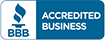

In [6]:
print(tesla_make)
print(tesla_model)
print(tesla_price)
print(tesla_image)

['2019 Tesla', '2019 Tesla', '2018 Tesla', '2019 Tesla', '2018 Tesla', '2019 Tesla', '2021 Tesla', '2019 Tesla', '2019 Tesla', '2019 Tesla', '2019 Tesla', '2019 Tesla', '2018 Tesla', '2017 Tesla', '2019 Tesla', '2018 Tesla', '2020 Tesla', '2019 Tesla', '2019 Tesla']
['Model 3', 'Model 3', 'Model 3', 'Model 3', 'Model 3', 'Model 3', 'Model 3', 'Model 3', 'Model 3', 'Model 3', 'Model 3', 'Model 3', 'Model 3', 'Model S', 'Model 3', 'Model 3', 'Model Y', 'Model 3', 'Model 3']
['$53,990', '$42,990', '$43,990', '$42,990', '$44,990', '$45,990', '$47,990', '$43,990', '$43,990', '$44,990', '$40,990', '$43,990', '$43,590', '$54,990', '$41,990', '$43,590', '$64,590', '$52,990', '$50,000']
['//cdnblob.fastly.carvana.io/2001248699/post-large/normalized/zoomcrop/2001248699-edc-02.jpg?v=2021.8.31_23.30.49&width=347', '//cdnblob.fastly.carvana.io/2001183920/post-large/normalized/zoomcrop/2001183920-edc-02.jpg?v=2021.9.2_15.11.50&width=347', '//cdnblob.fastly.carvana.io/2001243730/post-large/normalized
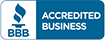

In [7]:
tesla_make_text = [ div.text for div in tesla_make ]
print(tesla_make_text)

tesla_model_text = [ div.text for div in tesla_model ]
print(tesla_model_text)

tesla_price_text = [ div.text for div in tesla_price ]
print(tesla_price_text)

tesla_image_source = [ img[ "src"] for img in tesla_image ]
print(tesla_image_source)

# For loop and find all Teslas

In [8]:
carvana_url = 'https://www.carvana.com/cars/tesla'
browser.visit(carvana_url)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')

tesla_make = soup.find_all('div', class_='year-make')
tesla_model = soup.find_all('div', class_='model')
tesla_price = soup.find_all('div', class_='price')
tesla_image = soup.find_all('img')

# browser.click_link_by_text('Next')

teslas = []

for i in range (0, len(tesla_make)):
    tesla = {}
    tesla['make']= tesla_make[i].text
    tesla['model']= tesla_model[i].text
    tesla['price']= tesla_price[i].text
    tesla['image']= tesla_image[i]['src']
    teslas.append(teslas)
    print(tesla)

{'make': '2019 Tesla', 'model': 'Model 3', 'price': '$53,990', 'image': '//cdnblob.fastly.carvana.io/2001248699/post-large/normalized/zoomcrop/2001248699-edc-02.jpg?v=2021.8.31_23.30.49&width=347'}
{'make': '2019 Tesla', 'model': 'Model 3', 'price': '$42,990', 'image': '//cdnblob.fastly.carvana.io/2001183920/post-large/normalized/zoomcrop/2001183920-edc-02.jpg?v=2021.9.2_15.11.50&width=347'}
{'make': '2018 Tesla', 'model': 'Model 3', 'price': '$44,990', 'image': '//cdnblob.fastly.carvana.io/2001190503/post-large/2001190503-edc-02-search.jpg?v=2021.8.24_16.46.41'}
{'make': '2018 Tesla', 'model': 'Model 3', 'price': '$43,990', 'image': '//cdnblob.fastly.carvana.io/2001243730/post-large/normalized/zoomcrop/2001243730-edc-02.jpg?v=2021.9.10_21.27.33&width=347'}
{'make': '2019 Tesla', 'model': 'Model 3', 'price': '$50,000', 'image': '//cdnblob.fastly.carvana.io/2001204809/post-large/2001204809-edc-02-search.jpg?v=2021.9.12_22.20.31'}
{'make': '2019 Tesla', 'model': 'Model 3', 'price': '$42,

In [9]:
print(teslas)

[[...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...]]


In [45]:
facts_url = 'https://en.wikipedia.org/wiki/Tesla_Supercharger'
tables = pd.read_html(facts_url)
supercharger_df = tables[0]
supercharger_df

,Quarter,Supercharger Stations,Supercharger Connectors,Source
0,Q4 2012,7,.,[72]
1,Q1 2013,7,.,[72]
2,Q2 2013,9,.,[73]
3,Q3 2013,30,.,[74]
4,Q4 2013,63,.,[75]
5,Q1 2014,101,.,[76]
6,Q2 2014,156,.,[77]
7,Q3 2014,235,.,[78]
8,Q4 2014,380,.,[79]
9,Q1 2015,425,.,[80]


In [46]:
supercharger_df.drop(['Source', 'Supercharger Connectors'], axis=1, inplace = True)
supercharger_df
# fact_table = supercharger_df.to_html()
# fact_table.replace('\n', '')

,Quarter,Supercharger Stations
0,Q4 2012,7
1,Q1 2013,7
2,Q2 2013,9
3,Q3 2013,30
4,Q4 2013,63
5,Q1 2014,101
6,Q2 2014,156
7,Q3 2014,235
8,Q4 2014,380
9,Q1 2015,425


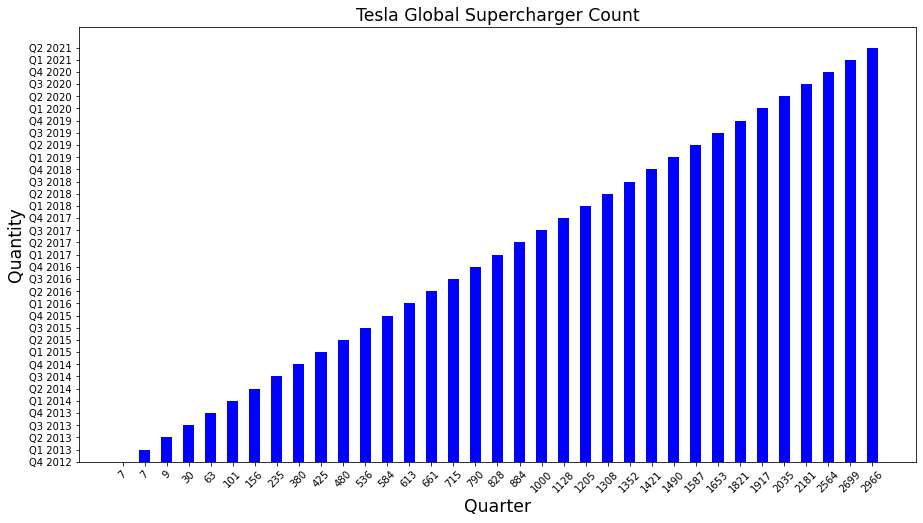

In [53]:
x_axis = np.arange(len(supercharger_df["Quarter"]))
plt.figure(figsize=(15,8))
plt.bar(x_axis, supercharger_df["Quarter"], 0.5, label = "Quantity", color="blue")
plt.xticks(x_axis,supercharger_df["Supercharger Stations"],rotation=45,)
plt.xlabel("Quarter", fontsize="xx-large")
plt.ylabel("Quantity", fontsize="xx-large")
plt.title("Tesla Global Supercharger Count", fontsize="xx-large")
plt.savefig("Images/tesla_count")
plt.show()
plt.close()

In [54]:
import plotly.graph_objects as go

x = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', ]
y = [7, 63, 380, 584, 790, 1128, 1421, 1821, 2564]

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=y,
            textposition='auto',
        )])

fig.show()

In [9]:
browser.quit()